#linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


#simple linear regression code

In [2]:
iri=pd.read_csv("iris.csv")
x_values=iri["5.1"]
y_values=iri["3.5"]
print(y_values)
print(x_values)

0      3.0
1      3.2
2      3.1
3      3.6
4      3.9
      ... 
144    3.0
145    2.5
146    3.0
147    3.4
148    3.0
Name: 3.5, Length: 149, dtype: float64
0      4.9
1      4.7
2      4.6
3      5.0
4      5.4
      ... 
144    6.7
145    6.3
146    6.5
147    6.2
148    5.9
Name: 5.1, Length: 149, dtype: float64


In [3]:
iri

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


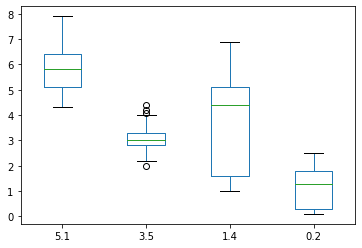

In [4]:
iri.plot(kind="box")
plt.show()

In [5]:
iri.corr()

,5.1,3.5,1.4,0.2
5.1,1.000000,-0.112106,0.871281,0.816961
3.5,-0.112106,1.000000,-0.423302,-0.360480
1.4,0.871281,-0.423302,1.000000,0.962423
0.2,0.816961,-0.360480,0.962423,1.000000


In [6]:
a=iri["3.5"].values
a=np.cumsum(a)
b=iri["5.1"].values
b=np.cumsum(b)

In [7]:
a=pd.DataFrame(a)
b=pd.DataFrame(b)


In [8]:
lm=LinearRegression()
model=lm.fit(a,b)

In [9]:
print(model.coef_)#slope of line

[[1.96693871]]


In [10]:
print(model.intercept_)

[-51.91144473]


In [11]:
print(model.score(a,b))

0.9928195395367722


<Figure size 432x288 with 0 Axes>

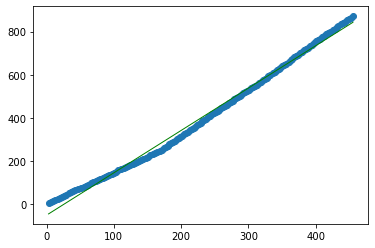

In [12]:
fig=plt.figure()

fig,axis=plt.subplots(nrows=1,ncols=1)
axis.scatter(a,b)
axis.plot(a,model.predict(a),"g",linewidth=1)

In [13]:
#print(model.predict(nem_a))

In [14]:
print(model.predict([[45]]))

[[36.6007972]]


# another example

In [15]:
data=pd.read_csv("linearreg.csv")

(data)


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [16]:
x=data["SAT"]
y=data["GPA"]
print(type(x),y)

<class 'pandas.core.series.Series'> 0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64


In [17]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)


In [18]:
lm1=LinearRegression()
model1=lm1.fit(x,y)

In [19]:
print(model1.score(x,y))

0.40600391479679765


In [20]:
y_predict=model1.predict(x)

In [21]:
y_original=y.values

In [22]:
root_square_error=(np.sum((y_predict-y_original)**2)/(len(y_original)))**0.5
print(root_square_error)

0.20808860291153056


# error analysis


In [23]:
from sklearn import datasets
d=datasets.load_boston() #just a sample data


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,train_size=70,test_size=30,random_state=6) #seed for random
print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

(70, 1) (70, 1) (30, 1) (30, 1)


In [25]:
lm2=LinearRegression()
model2=lm2.fit(x_train,y_train)


In [26]:
mean_square_error=np.mean((y_train-model2.predict(x_train))**2)
print(mean_square_error)

0    441.912728
dtype: float64


In [27]:
 from sklearn.metrics import mean_squared_error

In [28]:
print(mean_squared_error(y_train,model2.predict(x_train)))

441.912727714428


# Finding R^2 value is a form of accuracy of the model

In [29]:
from sklearn.metrics import r2_score

In [30]:
print(r2_score(y_train,model2.predict(x_train)))

0.9931009716527303


In [31]:
from sklearn.model_selection import cross_validate

In [32]:
from sklearn.model_selection import cross_validate,cross_val_score

In [33]:
print(cross_validate(model2,x_train,y=y_train))

{'fit_time': array([0.0059936 , 0.00499582, 0.00799727, 0.00599575, 0.00399709]), 'score_time': array([0.00700045, 0.00599337, 0.00299811, 0.00299644, 0.00299811]), 'test_score': array([0.98760449, 0.99379986, 0.99246661, 0.99411132, 0.99216364])}


<Figure size 432x288 with 0 Axes>

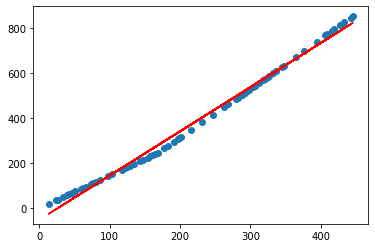

In [34]:
fig=plt.figure()
fig,ax=plt.subplots(nrows=1,ncols=1)
ax.scatter(x_train,y_train)
ax.plot(x_train,model2.predict(x_train),"r")